# EDA 
In this notebook I perform EDA on listings.csv file 

In [1]:
#import required python packages
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [2]:
df_listings = pd.read_csv("listings.csv") #import the file

In [3]:
df_listings.head() #dataset overview

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
print("The given dataset contains {} listings and {} corresponding fields".format(df_listings.shape[0],df_listings.shape[1]))

The given dataset contains 3818 listings and 92 corresponding fields


###  The first task is to remove unwanted fields

In [5]:
print("Columns in the dataframe:")
for column in df_listings.columns:
    print(column)

Columns in the dataframe:
id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar

In [6]:
cols = df_listings.columns[df_listings.isna().sum() > 0.75*df_listings.shape[0]]
print("Columns with more than 75% data missing :{}".format(cols))

Columns with more than 75% data missing :Index(['square_feet', 'license'], dtype='object')


In [7]:
#removing unwanted columns 
df_listings = df_listings.drop(columns=['id', 'listing_url','square_feet','thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 'host_id', 'host_url', 'host_name','host_thumbnail_url', 'host_picture_url','scrape_id', 'last_scraped','license'])

In [8]:
# lisf of Smart locations and their counts 
df_listings.smart_location.value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
seattle, wa                     1
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
Name: smart_location, dtype: int64

From the above data it is clear that almost all of smart locations are in Seattle.  

# In the following cells, I will explore details about hosts

## Type of host verifications

In [9]:

df_listings.host_verifications.astype(str)[1]

"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"

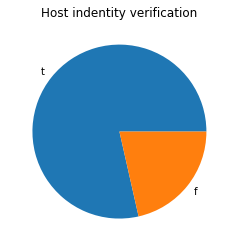

In [10]:
df_listings['host_identity_verified'].value_counts().plot(kind='pie', )
plt.title("Host indentity verification")
plt.ylabel("")
plt.show()

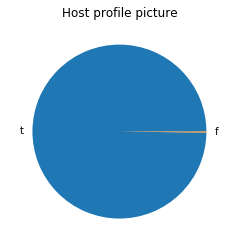

In [11]:
df_listings.host_has_profile_pic.value_counts().plot(kind='pie', title = 'Host profile picture')
plt.ylabel("")
plt.show()

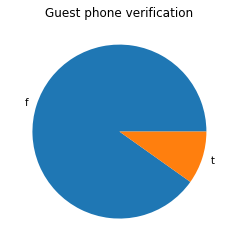

In [12]:
df_listings['require_guest_phone_verification'].value_counts().plot(kind='pie', )
plt.title("Guest phone verification")
#plt.xlabel("require_guest_phone_verification")
plt.ylabel("")
plt.savefig("PhoneVerification.jpg")
plt.show()

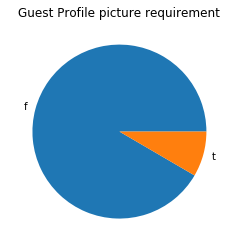

In [13]:
df_listings.require_guest_profile_picture.value_counts().plot(kind='pie', title = 'Guest Profile picture requirement', use_index=False)
plt.ylabel("")
plt.show()

# In the following cells, I will explore details about the listings

## Number of bedroom distribution

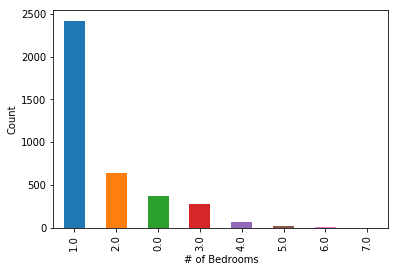

In [14]:
df_listings['bedrooms'].value_counts().plot(kind='bar', )
#plt.title("# of Bedrooms")
plt.xlabel("# of Bedrooms")
plt.ylabel("Count")
plt.show()

### From the above data, it is clear that most of the rentals have a single bedroom

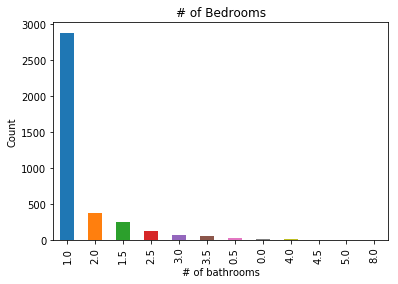

In [15]:
df_listings['bathrooms'].value_counts().plot(kind='bar', )
plt.title("# of Bedrooms")
plt.xlabel("# of bathrooms")
plt.ylabel("Count")
plt.show()

### From the above data, it is clear that most of the rentals have a single bathroom

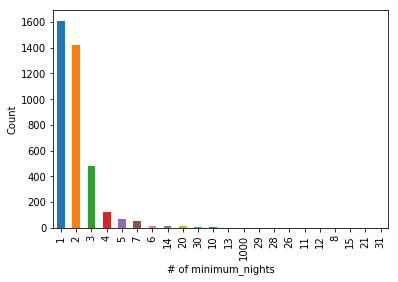

In [16]:
df_listings['minimum_nights'].value_counts().plot(kind='bar', )
#plt.title("# Number of nights")
plt.xlabel("# of minimum_nights")
plt.ylabel("Count")
plt.show()

In [17]:
#maximum nights
df_listings['maximum_nights'].value_counts()[:5]

1125    2453
30       183
365      148
14       123
7        108
Name: maximum_nights, dtype: int64

### From the above data, it is clear that most of the rentals require a minimum of  one or two night stay and many rentals offer rentals upto 6 years

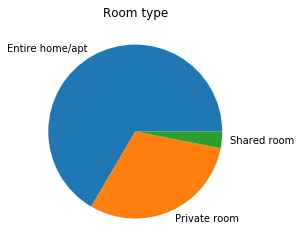

In [18]:
fig, ax = plt.subplots()
df_listings['room_type'].value_counts().plot(kind='pie' )
ax.set_title('Room type')
plt.ylabel("")
plt.show()

### Majority of the listings rent the entire home or apartment 

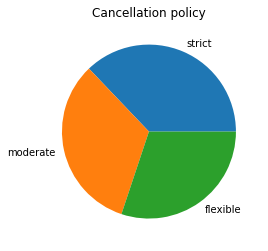

In [19]:
df_listings.cancellation_policy
df_listings['cancellation_policy'].value_counts().plot(kind='pie' )
#plt.title("# of Bedrooms")
plt.title("Cancellation policy")
plt.ylabel("")
plt.show()

## Cancellation policy is equally dirstibuted between 'flexible', 'strict' and 'moderate' 

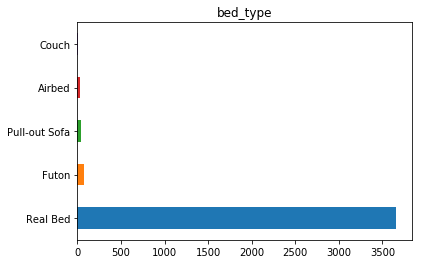

In [20]:
df_listings['bed_type'].value_counts().plot(kind='barh', )
#plt.title("# of Bedrooms")
plt.title("bed_type")

plt.show()

## Cleaning fee

In [21]:
df_cleaning_fee = df_listings.cleaning_fee.dropna().reset_index(drop=True)
df_cleaning_fee = df_cleaning_fee.str.replace(r'$', '').astype(float)
average_fee = round(df_cleaning_fee.describe()['mean'],2)
maximum_fee = round(df_cleaning_fee.describe()['max'],2)
mininmum_fee = round(df_cleaning_fee.describe()['min'],2)
print("The average cleaning fee is ${}, mininmum fee is ${} and maximum fee is ${}".format(average_fee,mininmum_fee,maximum_fee))

The average cleaning fee is $61.71, mininmum fee is $5.0 and maximum fee is $300.0


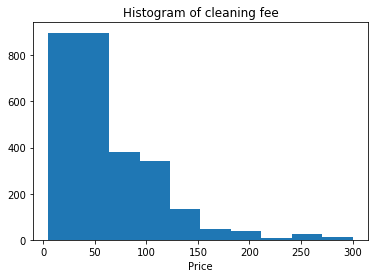

In [22]:
plt.hist(df_cleaning_fee)
plt.title("Histogram of cleaning fee")
plt.xlabel("Price")
plt.show()

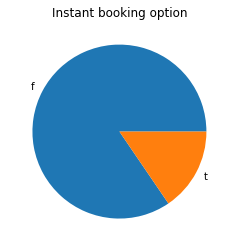

In [23]:
df_listings.instant_bookable.value_counts().plot(kind='pie', title = 'Instant booking option')
plt.ylabel("")
plt.show()

## In the following cells I'll analyse columns more about hosts and super hosts

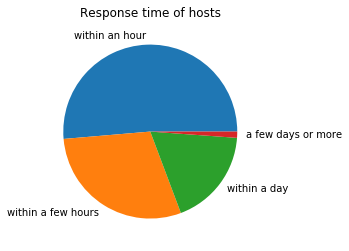

In [24]:
df_listings.host_response_time.value_counts().plot(kind='pie', )
plt.ylabel("")
plt.title("Response time of hosts")
plt.show()

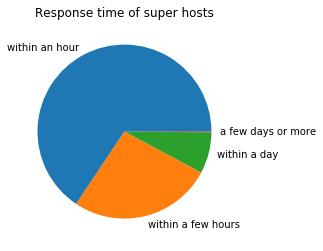

In [25]:
df_listings[df_listings['host_is_superhost'] == 't']['host_response_time'].value_counts().plot(kind='pie', )
plt.ylabel("")
plt.title("Response time of super hosts")
plt.show()

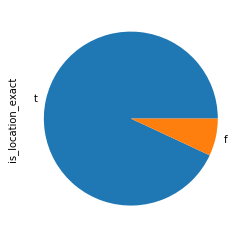

In [26]:
df_listings[df_listings['host_is_superhost'] == 't']['is_location_exact'].value_counts().plot(kind='pie', )
plt.show()

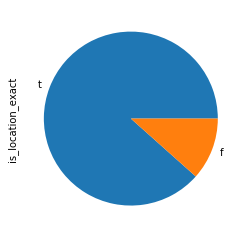

In [27]:
df_listings[df_listings['host_is_superhost'] == 'f']['is_location_exact'].value_counts().plot(kind='pie', )
plt.show()

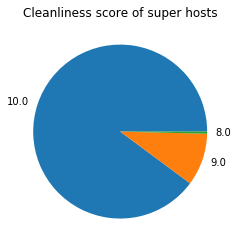

In [28]:
df_listings[df_listings['host_is_superhost'] == 't']['review_scores_cleanliness'].value_counts()[:8].plot(kind='pie', )
plt.ylabel("")
plt.title("Cleanliness score of super hosts")
plt.show()

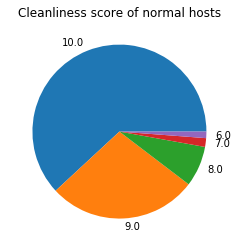

In [29]:
df_listings[df_listings['host_is_superhost'] == 'f']['review_scores_cleanliness'].value_counts()[:6].plot(kind='pie', )
plt.ylabel("")
plt.title("Cleanliness score of normal hosts")
plt.show()

In [30]:
#Number of super hosts
normal_hosts = df_listings.host_is_superhost.value_counts()['f']
super_hosts  = df_listings.host_is_superhost.value_counts()['t']
ratio_super_hosts = (super_hosts)/(super_hosts+normal_hosts)
percent_super_hosts = round(ratio_super_hosts*100,2)
print("Number of super hosts : {}".format(super_hosts))
print("Percentage of hosts who are super hosts in Seattle {}%".format(percent_super_hosts))

Number of super hosts : 778
Percentage of hosts who are super hosts in Seattle 20.39%


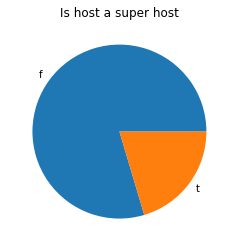

In [31]:
df_listings.host_is_superhost.value_counts().plot(kind='pie', )
plt.ylabel("")
plt.title("Is host a super host")
plt.show()

## Security deposit 

In [32]:
df_listings.security_deposit = df_listings.security_deposit.str.replace(r'$', '')
df_listings.security_deposit = df_listings.security_deposit.str.replace(r',', '').astype(float)
average_fee = round(df_listings.security_deposit.describe()['mean'],2)
maximum_fee = round(df_listings.security_deposit.describe()['max'],2)
mininmum_fee = round(df_listings.security_deposit.describe()['min'],2)
print("The average security deposit is ${}, mininmum deposit is ${} and maximum deposit is ${}".format(average_fee,mininmum_fee,maximum_fee))

The average security deposit is $287.61, mininmum deposit is $95.0 and maximum deposit is $5000.0


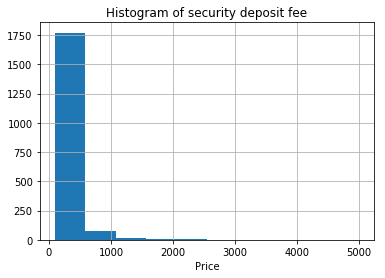

In [33]:
df_listings.security_deposit.dropna().hist()
plt.title("Histogram of security deposit fee")
plt.xlabel("Price")
plt.show()

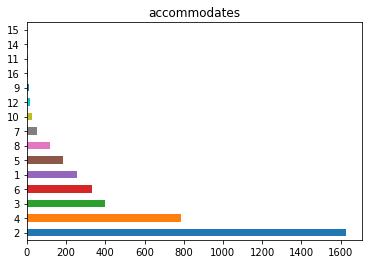

In [34]:

df_listings['accommodates'].value_counts().plot(kind='barh', )
plt.title("accommodates")

plt.show()

## In the following cells, I will analyse the features that have more impact on the pricing

In [35]:
amenities_dict = {}
no_of_amenties = []

In [36]:
for row in df_listings.amenities:
    for i,item in enumerate(row.replace(r'{', '').replace(r'}','').split(',')):
            #temp.append(item)
            if item in amenities_dict:
                 amenities_dict[item] += 1
            else:
                amenities_dict[item] = 1
    no_of_amenties.append(i+1)

In [37]:
df_listings['no_of_amenties'] = no_of_amenties

In [38]:
amenities_list = sorted(amenities_dict, key=amenities_dict.get)
print("Top 15 amenties")
amenities_list[-15:]

Top 15 amenties


['"First Aid Kit"',
 '"Family/Kid Friendly"',
 '"Free Parking on Premises"',
 '"Fire Extinguisher"',
 '"Carbon Monoxide Detector"',
 'TV',
 'Shampoo',
 'Internet',
 'Washer',
 'Dryer',
 'Essentials',
 '"Smoke Detector"',
 'Kitchen',
 'Heating',
 '"Wireless Internet"']

In [39]:
t4 = {}
for amenity in amenities_list[-15:]:
    t4[amenity] = amenities_dict[amenity]

In [40]:
t4

{'"First Aid Kit"': 1680,
 '"Family/Kid Friendly"': 1963,
 '"Free Parking on Premises"': 2167,
 '"Fire Extinguisher"': 2196,
 '"Carbon Monoxide Detector"': 2485,
 'TV': 2574,
 'Shampoo': 2670,
 'Internet': 2811,
 'Washer': 2992,
 'Dryer': 2997,
 'Essentials': 3237,
 '"Smoke Detector"': 3281,
 'Kitchen': 3423,
 'Heating': 3627,
 '"Wireless Internet"': 3667}

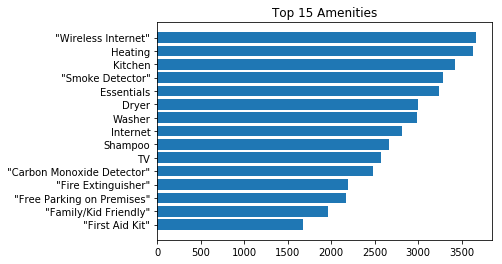

In [41]:
plt.barh(range(len(t4)), list(t4.values()), align='center')
plt.yticks(range(len(t4)), list(t4.keys()), )
plt.title("Top 15 Amenities")
plt.show()

In [42]:
#Listing price
df_listings.price = df_listings.price.str.replace(r'$', '')
df_listings.price = df_listings.price.str.replace(r',', '').astype(float)

#Weekly listing price
df_listings.weekly_price = df_listings.weekly_price.str.replace(r'$', '')
df_listings.weekly_price = df_listings.weekly_price.str.replace(r',', '').astype(float)

#Monthly listing price
df_listings.monthly_price = df_listings.monthly_price.str.replace(r'$', '')
df_listings.monthly_price = df_listings.monthly_price.str.replace(r',', '').astype(float)

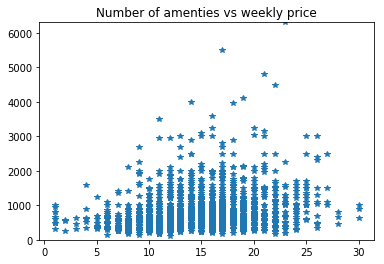

In [43]:
plt.plot( df_listings.no_of_amenties, df_listings.weekly_price,'*')
plt.ylim([0,df_listings.weekly_price.max()])
plt.title("Number of amenties vs weekly price")
plt.show()

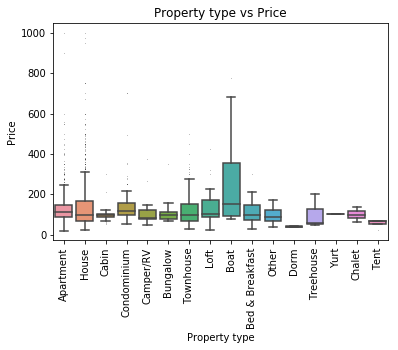

In [44]:
ax = sns.boxplot(data=df_listings, x='property_type', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Property type")
ax.set_ylabel("Price")
ax.set_title("Property type vs Price")
plt.show()

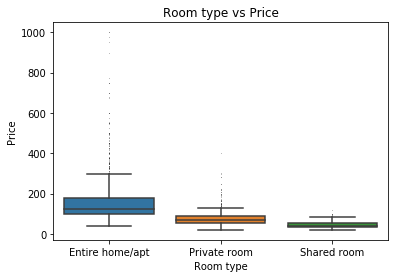

In [45]:
ax = sns.boxplot(data=df_listings, x='room_type', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel("Room type")
ax.set_ylabel("Price")
ax.set_title('Room type vs Price')
plt.show()

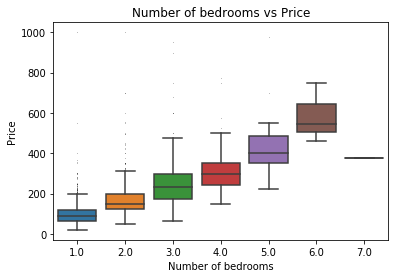

In [46]:
ax = sns.boxplot(data=df_listings[df_listings['bedrooms'] != 0], x='bedrooms', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Number of bedrooms vs Price')
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Price")
plt.show()

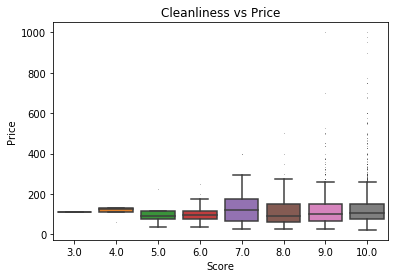

In [47]:
ax = sns.boxplot(data=df_listings, x='review_scores_cleanliness', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Cleanliness vs Price')
ax.set_xlabel("Score")
ax.set_ylabel("Price")
plt.show()

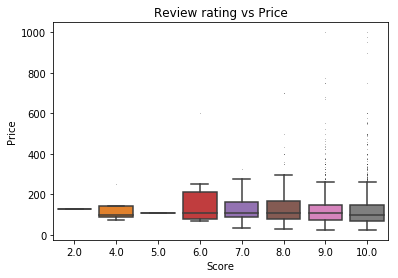

In [48]:
ax = sns.boxplot(data=df_listings, x='review_scores_value', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Review rating vs Price') 
ax.set_xlabel("Score")
ax.set_ylabel("Price")
plt.show()

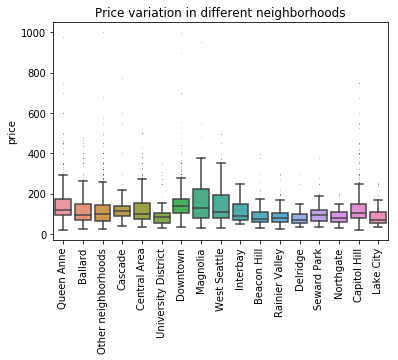

In [49]:
ax = sns.boxplot(data=df_listings, x ='neighbourhood_group_cleansed', y ='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title("Price variation in different neighborhoods")
plt.xlabel("")
plt.show()
#more the number of bedrooms, higher the price

In [50]:
price_neighbourhood = df_listings.groupby(["neighbourhood_group_cleansed"])["price"].mean().sort_values(ascending=False)

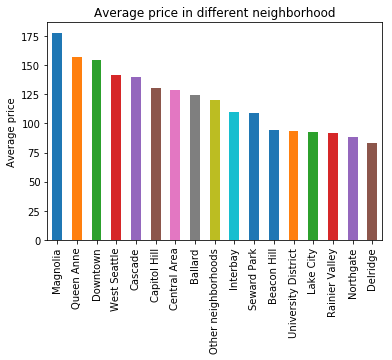

In [51]:
price_neighbourhood.plot(kind='bar', )
plt.title("Average price in different neighborhood")
plt.xlabel("")
plt.ylabel("Average price")
plt.show()